In [86]:
import pandas as pd
import matplotlib
import numpy as np

In [3]:
data = pd.read_csv("Purchase_Card_Transactions.csv")
data.head()

,OBJECTID,AGENCY,TRANSACTION_DATE,TRANSACTION_AMOUNT,VENDOR_NAME,VENDOR_STATE_PROVINCE,MCC_DESCRIPTION
0,2,Department of Mental Health,2009/01/05 05:00:00+00,229.50,WW GRAINGER 912,DC,"Industrial Supplies, Not Elsewhere Classified"
1,3,District Department of Transportation,2009/01/05 05:00:00+00,3147.33,BRANCH SUPPLY,DC,"Stationery, Office & School Supply Stores"
2,4,Department of Youth Rehabilitation Services,2009/01/05 05:00:00+00,54.00,VIDEO MONITORING SRVCS,NY,Motion Pictures/Video Tape Production&Distribu...
3,5,Office of Employee Appeals,2009/01/05 05:00:00+00,137.35,STAPLES 00102186,DC,"Stationery,Office Supplies,Printing/Writing Paper"
4,6,Office of Police Complaints,2009/01/06 05:00:00+00,1340.80,FAITH MGMT CONSULTING,DC,"Stationery, Office & School Supply Stores"


In [10]:
data.shape

(433926, 7)

In [40]:
data.columns

Index(['OBJECTID', 'AGENCY', 'TRANSACTION_DATE', 'TRANSACTION_AMOUNT',
       'VENDOR_NAME', 'VENDOR_STATE_PROVINCE', 'MCC_DESCRIPTION'],
      dtype='object')

In [41]:
# useful commands
# unique values - data.AGENCY.unique()

# Transaction costs by agency sorted by mean, std, and count

In [42]:
transaction_by_agency = data.groupby("AGENCY").agg(['mean', 'std', 'count'])["TRANSACTION_AMOUNT"]
transaction_by_agency.sort_values('mean', ascending=False)

,mean,std,count
AGENCY,,,
Office of Contracting & Procurement,7524.287371,46207.212753,4173
Office of the Tenant Advocate,1411.662804,3549.182076,3502
Office of the Secretary,896.744403,1410.250723,2110
Department of Parks & Recreation,870.031936,1260.305716,7556
Unknown New Agency,811.456743,1414.603239,5849
...,...,...,...
Department on Disability Services,282.006059,539.421073,20487
Judicial Nomination Commission,202.160303,424.599557,495
Office of Victim Services,182.765303,301.180800,198


In [43]:
transaction_by_agency.sort_values('std', ascending=False)

,mean,std,count
AGENCY,,,
Office of Contracting & Procurement,7524.287371,46207.212753,4173
Office of the Tenant Advocate,1411.662804,3549.182076,3502
Unknown New Agency,811.456743,1414.603239,5849
Office of the Secretary,896.744403,1410.250723,2110
OFFICE OF CAMPAIGN FINANCE,684.842882,1308.969196,170
...,...,...,...
NFP Hospital Corporation,396.621161,454.931429,517
Judicial Nomination Commission,202.160303,424.599557,495
Advisory Neighborhood Commission,178.979670,344.156413,182


In [44]:
transaction_by_agency.sort_values('count', ascending=False)

,mean,std,count
AGENCY,,,
District of Columbia Public Schools,526.116020,856.995183,56852
District Department of Transportation,451.359632,852.392869,25480
Fire & Emergency Medical Services,713.728853,973.900508,23123
Department on Disability Services,282.006059,539.421073,20487
Department of Health,563.755472,830.404698,17220
...,...,...,...
Advisory Neighborhood Commission,178.979670,344.156413,182
Office of Partnership & Grant Services,659.189191,821.509531,173
OFFICE OF CAMPAIGN FINANCE,684.842882,1308.969196,170


# Transaction costs by vendor sorted by mean, std, and count

In [49]:
transaction_by_vendor = data.groupby("VENDOR_NAME").agg(['mean', 'std', 'count'])["TRANSACTION_AMOUNT"]
transaction_by_vendor.sort_values('mean', ascending=False)

,mean,std,count
VENDOR_NAME,,,
CAPITOL PAVING OF DC I,466873.750000,110766.509506,2
TOTAL CIVIL CONSTRUCTI,412059.125833,218541.606647,24
NORTHEAST SNOWPLOW,233100.000000,NaN,1
JJ PRIME SERVICES LLC,215681.001111,93880.844769,9
AERO SNOW REMOVAL CORP,194521.000000,NaN,1
...,...,...,...
IN *AVRS INC,-2894.000000,NaN,1
CDW GOVT #SXS9856,-2908.890000,NaN,1
DISPUTE CREDIT ADJ ME,-3000.000000,NaN,1


In [50]:
transaction_by_vendor.sort_values('count', ascending=False)

,mean,std,count
VENDOR_NAME,,,
STANDARD OFFICE SUPPLY,633.831121,914.937389,17075
AMAZON MKTPLACE PMTS,160.903538,333.235375,14699
METRO FARE AUTOLOAD,59.971795,43.028999,12622
AMZN MKTP US,208.192860,409.124891,9542
AMAZON.COM,170.380070,305.011595,8485
...,...,...,...
AMAZON.COM*MT74U2CE0,526.320000,NaN,1
EB 2016 REENGAGEMENT,376.180000,NaN,1
MATTERS OF TASTE,349.140000,NaN,1


In [48]:
data.sort_values('TRANSACTION_DATE', ascending=False)

,OBJECTID,AGENCY,TRANSACTION_DATE,TRANSACTION_AMOUNT,VENDOR_NAME,VENDOR_STATE_PROVINCE,MCC_DESCRIPTION
433694,433695,District of Columbia Public Schools,2020/10/30 04:00:00+00,-63.82,SSI,WI,DIRECT MARKETING-OTHER DIRECT MARKETERS-NOT EL...
433702,433703,Office of the State Superintendent of Education,2020/10/30 04:00:00+00,2758.44,AMZN MKTP US,WA,BOOK STORES
433705,433706,City Administrator/Deputy Mayor,2020/10/30 04:00:00+00,1452.36,PUBLIC PERFORMANCE MAN,DC,COMP PROGRAMING DATA PRCSNG INTGRTD SYS DSGN SRVS
433693,433694,Board of Elections & Ethics,2020/10/30 04:00:00+00,1165.96,"QUEST EVENTS, LLC",TX,CONTRACTORS SPECIAL TRADE-NOT ELSEWHERE CLASSI...
433760,433761,Department of Human Services,2020/10/30 04:00:00+00,16.64,COMCAST,MD,CABLE SATELLITE OTHER PAY TELEVISION RADIO ...
...,...,...,...,...,...,...,...
303,182,Department of Employment Services,2009/01/02 05:00:00+00,115.98,BRENTWORKS INC,DC,"Commercial Photography, Art & Graphics"
302,181,Office of the Chief Financial Officer,2009/01/02 05:00:00+00,982.48,STANDARD OFFICE SUPPLY,DC,"Stationery, Office & School Supply Stores"
301,180,Fire & Emergency Medical Services,2009/01/02 05:00:00+00,129.00,AMERICAN COUNCIL ON EX,CA,"Educational Services, Not Elsewhere Classified"
318,197,Fire & Emergency Medical Services,2009/01/02 05:00:00+00,2298.28,WW GRAINGER 912,DC,"Industrial Supplies, Not Elsewhere Classified"


# What makes a successful business?

A business is successful if they increase spending over time relatively consistently.

    -Scatterplot of transactions over time.
    -Thats a bit messy, lets smooth it out with a running average. Thats better (side: which window size is best?)
    -But how do we know which businesses increase their spending?
    -Lets take a linear regression and sort by slope.
    -Some of these have low correlation, lets instead sort them using a function that accounts for this (slope * R^2)
    -Sorting by correlation puts the most consistent companies at the top, and the riskier ones at the bottom

In [172]:
from collections import defaultdict
from datetime import datetime
from sklearn.linear_model import LinearRegression

In [70]:
# {agency : [[Date, Transaction Cost], ...]}
agency_transaction_history = defaultdict(list)
for index, row in data.iterrows():
    agency_transaction_history[row["AGENCY"]].append([datetime.strptime(row["TRANSACTION_DATE"], '%Y/%m/%d %H:%M:%S+%f'), row["TRANSACTION_AMOUNT"]])

In [81]:
for history in agency_transaction_history.values():
    history.sort(key=lambda x: x[0])

In [106]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

In [177]:
# [agency, slope, R^2]
spending_projections = []
for agency, agency_data in agency_transaction_history.items():
    window_size = int(len(agency_data) / 10)
    dates, values = zip(*agency_data)
    
    running_dates = dates[window_size-1:]
    running_values = moving_average(values, window_size)
    
    matplotdates = matplotlib.dates.date2num(running_dates)
    
    reshaped_dates = np.array(matplotdates).reshape((-1, 1))
    
    model = LinearRegression().fit(reshaped_dates, running_values)
    spending_projections.append((agency, model.coef_[0], model.score(reshaped_dates, running_values)))

In [204]:
sorted_by_spending = sorted(spending_projections, key=lambda x: x[2])
sorted_by_spending

[('Commission of Judicial Disabilities & Tenure',
  0.0003324389684969422,
  0.00018479531741999455),
 ('DC Public Library', 0.0011884594188419017, 0.0006753999678599243),
 ('Office of the Secretary', -0.006644717568853465, 0.0007569666898307181),
 ('Public Employee Relations Board',
  -0.004360460957738148,
  0.002149156164612198),
 ('Office of the Chief Medical Examiner',
  0.009733794056572324,
  0.0044215291474064555),
 ('Public Service Commission', -0.0036575670504115664, 0.006848361702193051),
 ('Disability Compensation Fund', 0.01840596794746355, 0.008273929263697966),
 ('Office of Partnership & Grant Services',
  0.1691410015927572,
  0.008699765876448828),
 ('Serve DC', 0.07063416577288803, 0.010490684144648488),
 ('Office of Victim Services', -0.036264829969379735, 0.017185423553762957),
 ('Office of Contracting & Procurement',
  2.0330201000998365,
  0.02040918439743633),
 ('District Department of Transportation',
  0.007954146935025195,
  0.03652122826627102),
 ('City Admin

Commission of Judicial Disabilities & Tenure


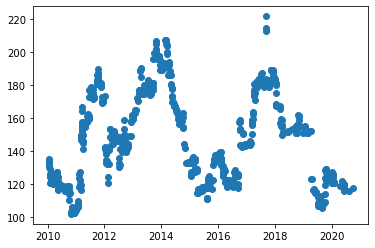

In [325]:
agency = "Commission of Judicial Disabilities & Tenure"
print(agency)
agency_data = agency_transaction_history[agency]
window_size = int(len(agency_data) / 10)
dates, values = zip(*agency_data)

running_dates = dates[window_size-1:]
running_values = moving_average(values, window_size)

matplotdates = matplotlib.dates.date2num(running_dates)
matplotlib.pyplot.plot_date(matplotdates, running_values)

Office of Motion Pictures & Television
[14802.16666667 14806.16666667 14807.16666667 14810.16666667
 14811.16666667 14816.16666667 14851.16666667 14853.16666667
 14853.16666667 14868.16666667 14872.16666667 14882.16666667
 14909.16666667 14911.16666667 14911.16666667 14915.16666667
 14915.16666667 14917.16666667 14917.16666667 14921.20833333
 14922.20833333 14922.20833333 14928.20833333 14930.20833333
 14945.20833333 14946.20833333 14951.20833333 14964.20833333
 14965.20833333 14966.20833333 14972.20833333 14978.20833333
 14979.20833333 14979.20833333 14985.20833333 14985.20833333
 14986.20833333 14988.20833333 14992.20833333 14995.20833333
 14996.20833333 14996.20833333 14996.20833333 14996.20833333
 14996.20833333 14996.20833333 14998.20833333 14999.20833333
 14999.20833333 14999.20833333 15000.20833333 15000.20833333
 15001.20833333 15005.20833333 15005.20833333 15006.20833333
 15006.20833333 15008.20833333 15013.20833333 15014.20833333
 15016.20833333 15016.20833333 15031.20833333 

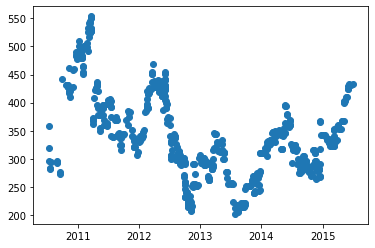

In [173]:
import random
for i in range(1):
    agency, agency_data = random.choice(list(agency_transaction_history.items()))
    print(agency)
    window_size = int(len(agency_data) / 10)
    dates, values = zip(*agency_data)
    
    running_dates = dates[window_size-1:]
    running_values = moving_average(values, window_size)
    
    matplotdates = matplotlib.dates.date2num(running_dates)
    print(matplotdates)
    matplotlib.pyplot.plot_date(matplotdates, running_values)

# Identifying Similar Businesses and Vendors

    -A business is similar to another business if they interact frequently with similar vendors or if they frequently buy the same types of things.
    -Two businesses are similar if their distribution of transactions is similar
    -Doing collaborative based filtering using movie recommendation with ratings as an example?
    

In [306]:
# {agency : {mcc_desc : {count: float, total_spent: float}}}
agency_vendor_data = {}
for agency in data.AGENCY.unique():
    if agency not in agency_vendor_data:
        agency_vendor_data[agency] = {}
    for vendor in data.VENDOR_NAME.unique():
        if vendor not in agency_vendor_data[agency]:
            agency_vendor_data[agency][vendor] = {}
        agency_vendor_data[agency][vendor]["count"] = 0
        agency_vendor_data[agency][vendor]["total_spent"] = 0  
    
for index, row in data.iterrows():
    agency_vendor_data[row["AGENCY"]][row["VENDOR_NAME"]]["count"] += 1
    agency_vendor_data[row["AGENCY"]][row["VENDOR_NAME"]]["total_spent"] += row["TRANSACTION_AMOUNT"]

In [308]:
# creating dataframe
agency_vendor_data_list = []
for agency in agency_vendor_data:
    for vendor in agency_vendor_data[agency]:
        agency_vendor_data_list.append([str(agency), str(vendor), agency_vendor_data[agency][vendor]["count"], agency_vendor_data[agency][vendor]["total_spent"]])
agency_vendor_data_list.sort(key=lambda x: (x[0], x[1]))
agency_vendor_df = pd.DataFrame(agency_vendor_data_list, columns = ['AGENCY', 'VENDOR_NAME', "NUM_TRANSACTIONS", "TOTAL_SPENT"])
agency_vendor_df["AVG_TRANSACTION_AMT"] = agency_vendor_df["TOTAL_SPENT"]/agency_vendor_df["NUM_TRANSACTIONS"]

In [309]:
agency_vendor_df

,AGENCY,VENDOR_NAME,NUM_TRANSACTIONS,TOTAL_SPENT,AVG_TRANSACTION_AMT
0,Advisory Neighborhood Commission,# 0501 LA QUINTA INNS,0,0.0,NaN
1,Advisory Neighborhood Commission,# 0583 LA QUINTA INNS,0,0.0,NaN
2,Advisory Neighborhood Commission,# 0633 LA QUINTA INNS,0,0.0,NaN
3,Advisory Neighborhood Commission,#427 SHERATON METAIRIE,0,0.0,NaN
4,Advisory Neighborhood Commission,#455-PRECISION DOORS&H,0,0.0,NaN
...,...,...,...,...,...
4944746,Unknown New Agency,ZUMMO INC,0,0.0,NaN
4944747,Unknown New Agency,ZUMRO INC,0,0.0,NaN
4944748,Unknown New Agency,ZURI FURNITURE LLC,0,0.0,NaN
4944749,Unknown New Agency,ZZOUNDS.COM,0,0.0,NaN


In [312]:
sorted_agencies = sorted(data.AGENCY.unique())
sorted_vendors = sorted([str(i) for i in data.VENDOR_NAME.unique()])
agency_bit_vectors = defaultdict(list)
for index, row in agency_vendor_df.iterrows():
    # could do greater than 0 or could do 5. mean is 6.5 transactions
    if row["NUM_TRANSACTIONS"] > 0:
        # agency_bit_vectors[row["AGENCY"]].append(1)
        agency_bit_vectors[row["AGENCY"]].append(row["NUM_TRANSACTIONS"])
    else:
        agency_bit_vectors[row["AGENCY"]].append(0)

In [313]:
from scipy import spatial

In [314]:
top_similar_businesses = defaultdict(list)
NUM_SIMILAR = 3
for agency1, vector1 in agency_bit_vectors.items():
    # [agency, similarity_score]
    similar_businesses = []
    for agency2, vector2, in agency_bit_vectors.items():
        if agency1 != agency2:
            similar_businesses.append((agency2,  1 - spatial.distance.cosine(vector1, vector2)))
    top_similar_businesses[agency1] = sorted(similar_businesses, key=lambda x: x[1], reverse=True)[:NUM_SIMILAR]

In [315]:
top_similar_businesses

defaultdict(list,
            {'Advisory Neighborhood Commission': [('Department of Housing & Community Development',
               0.8609465087337411),
              ('Department of Human Services', 0.8460085480838101),
              ('Office of Community Affairs', 0.8300398785510165)],
             'Alcoholic Beverage Regulation Administration': [('City Administrator/Deputy Mayor',
               0.6040507836673358),
              ('Department of Education', 0.591606101244286),
              ('Department of Health Care Finance', 0.583845318512084)],
             'Board of Elections & Ethics': [('District of Columbia Public Schools',
               0.3921643732155855),
              ('District Department of Transportation', 0.34162655899885497),
              ('Department of  Youth Rehabilitation Services',
               0.31722845346889716)],
             'Board of Real Property Assessment & Appeals': [('Public Employee Relations Board',
               0.711753909931949),
         

In [326]:
# with num_transactions vector
query_business = "Office of the Mayor"
top_similar_businesses[query_business]

[('Office of the Secretary', 0.9401996176842456),
 ('Department of Housing & Community Development', 0.8371889123894564),
 ('Department of Human Services', 0.8241995858683896)]

In [319]:
similar_to_query = top_similar_businesses[query_business]
recommendations = []
index = 0
for bit in agency_bit_vectors[query_business]:
    # check to see if at least 2 of the top 3 most similar businesses use that type of vendor
    count = 0
    for top_vendor in similar_to_query:
        if agency_bit_vectors[top_vendor[0]][index] > 1:
            count += 1
    if bit == 0 and count >= 2:
        recommendations.append(sorted_vendors[index])
    index += 1

In [320]:
recommendations

['ALLIED PARTY RENTALS',
 'CBS*CANONBUS SOLUTIONS',
 'CORNER BAKERY',
 'DOCUMENT  MANAGERS',
 'DOCUMENT MANAGERS',
 'DUTCH MILL CATERING',
 'GIANT 2376',
 'GIANT FOOD INC #375',
 'ICMA INTERNET',
 'NATIONAL ASSOCIATION O',
 'NATIONAL FORUM FOR BLA',
 'PAYPAL *ETHIOPIANCO',
 'POSITIVE PROMOTIONS',
 'REI*PAYMENT CENTER',
 'SAFEWAY  STORE00042051',
 'SQ *CENTRAL SAFE AN',
 'SQ *NORTH CAPITOL PART',
 'STAPLES DIRECT',
 'SYDAR OF D.C., LLC',
 'TPW CONSULTANT00 OF 00',
 'TPW CONSULTANTS',
 'ULINE',
 'ULINE  *SHIP SUPPLIES',
 'WASHINGTON PHOTO COPY',
 'WHITAKERBROTHERS.COM',
 'WMATA METRO CENTER BUL']